# Loan Prediction Analysis

In [64]:
import pandas as pd
import numpy as np 
import pyrsm as rsm

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from scipy.stats import norm
from scipy import stats

In [3]:
data = pd.read_csv("loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
# Shape
print(data.shape[0])


4269


In [5]:
# Column names
print(data.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [6]:
data.iloc[:, :-1].describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Check for Duplicates and Missing Values

In [7]:
duplicate = data[data.duplicated(['loan_id'])]
duplicate

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


No overlapping values in the ID column, which indicates that each observation is a unique loan.

Text(0.5, 1.0, 'Total Missing Values')

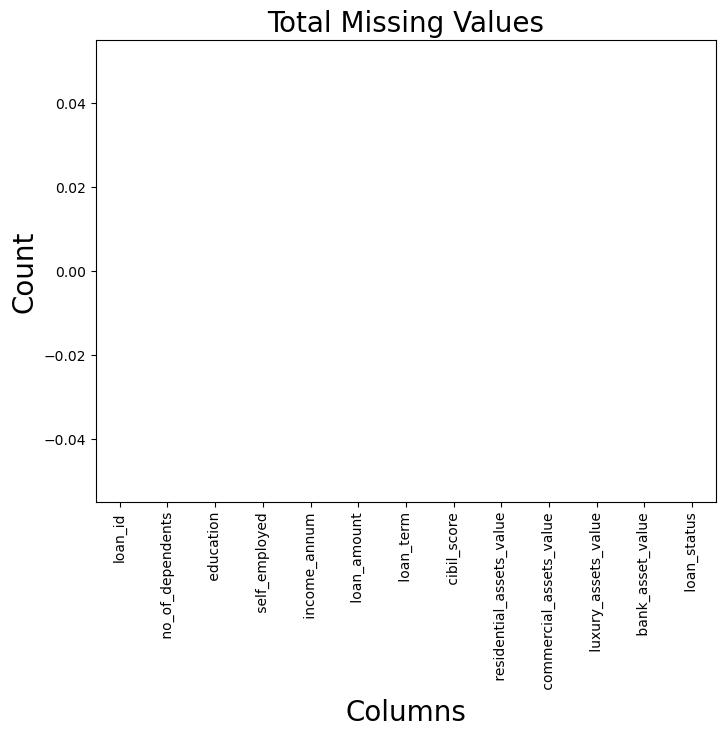

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

The chart above shows that there are no missing values.

In [9]:
data.columns = [col.lstrip() for col in data.columns]

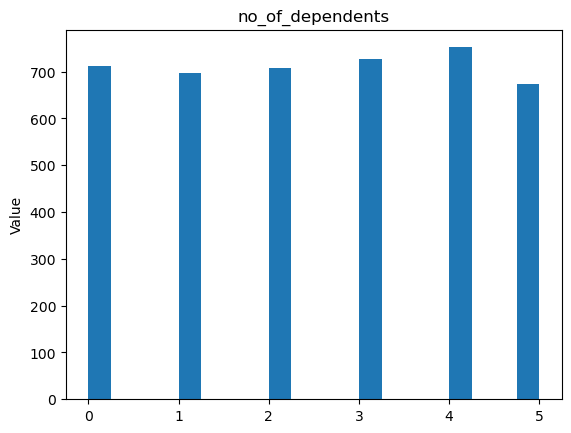

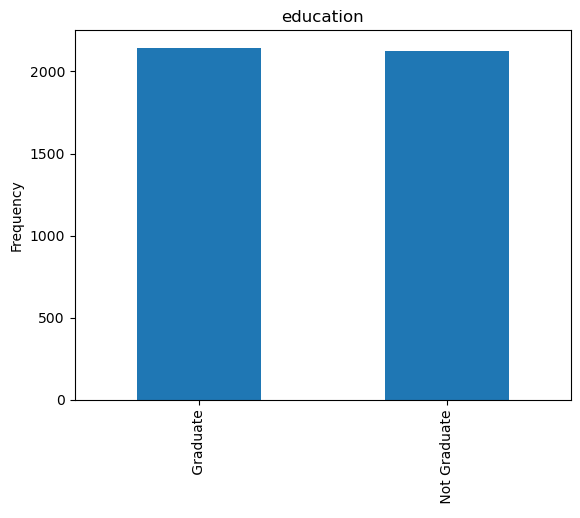

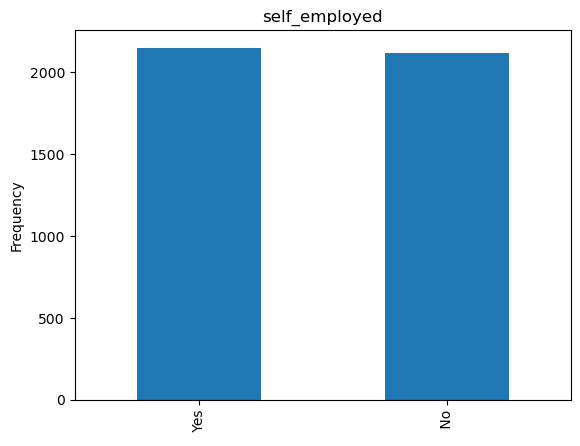

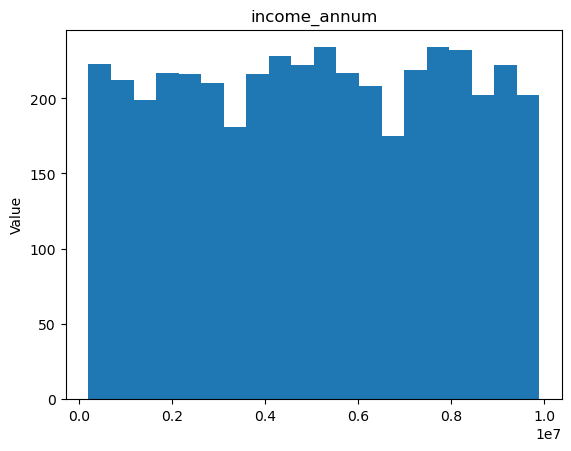

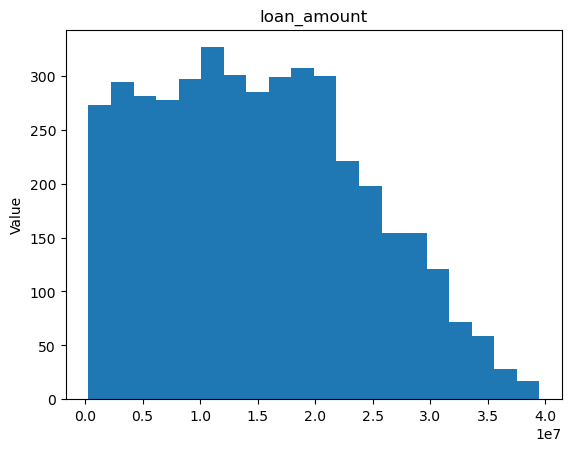

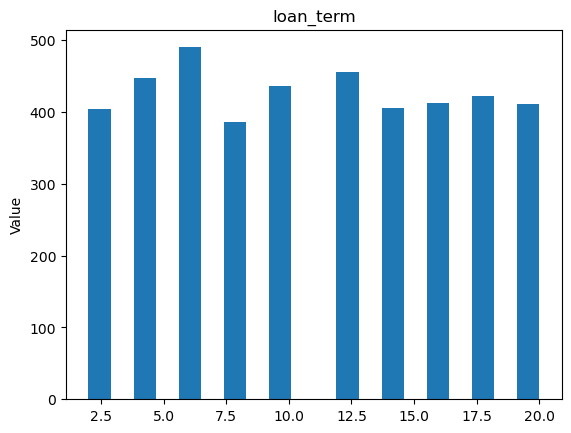

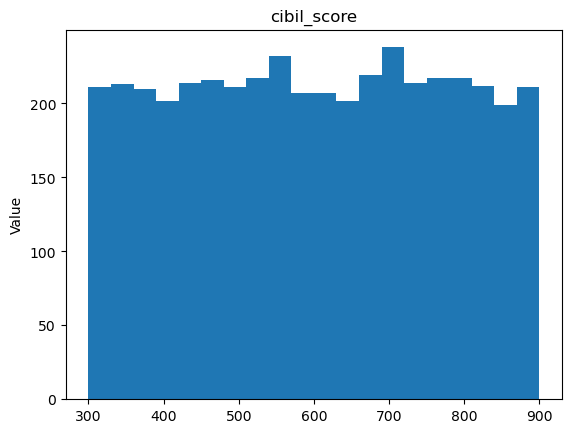

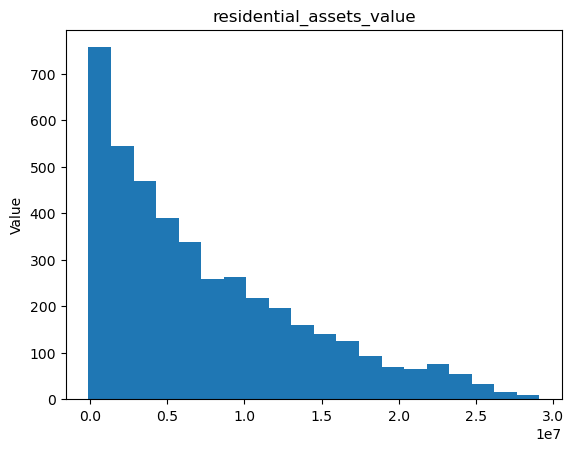

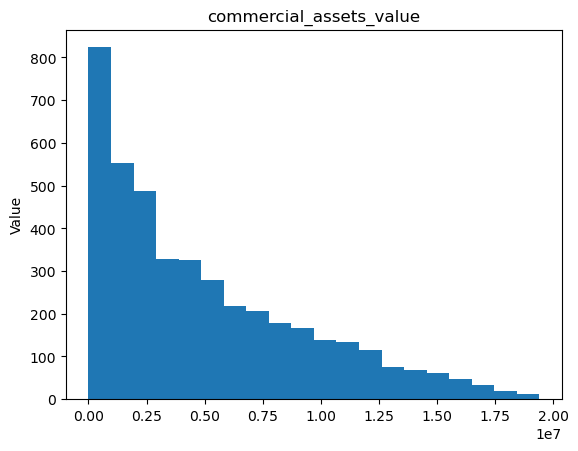

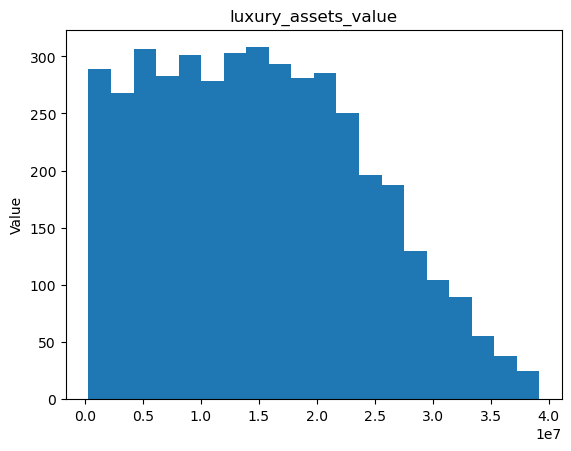

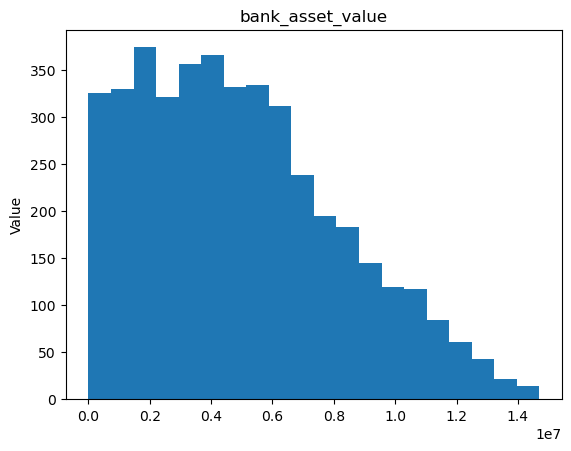

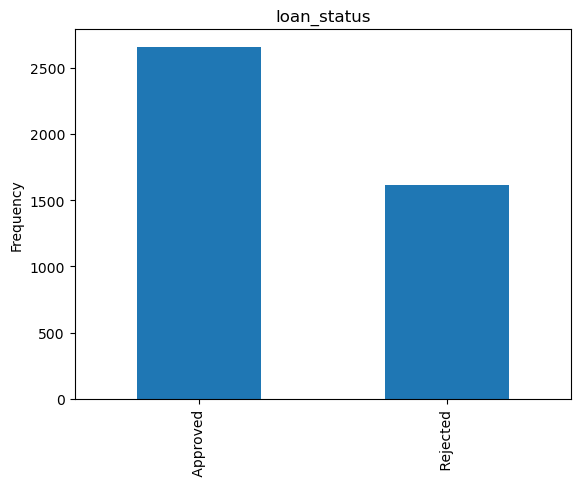

In [10]:
loan_id = ['loan_id']

# Loop through columns
for column in data.columns:
    if column not in loan_id:
        plt.figure()
        if data[column].dtype == 'object':
            data[column].value_counts().plot(kind='bar')
            plt.title(column)
            plt.ylabel('Frequency')
            plt.show()
        elif data[column].dtype == 'int64':
            data[column].plot(kind='hist', bins=20)
            plt.title(column)
            plt.ylabel('Value')
            plt.show()

## Correlation Graphs

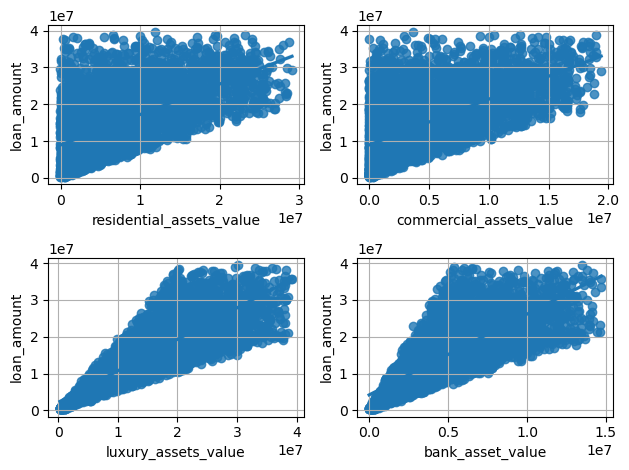

In [11]:
r=2
c=2
it=1
for i in ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']:
    plt.subplot(r,c,it)
    sns.regplot(x=i,y='loan_amount',data=data)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

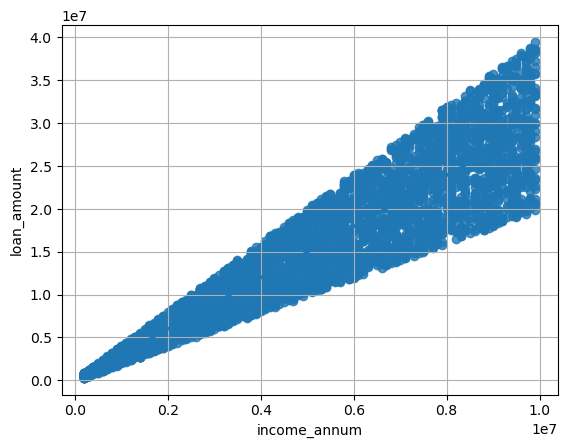

In [12]:
sns.regplot(x='income_annum',y='loan_amount',data=data)
plt.grid()
plt.show()

We seem to have strong linear relationships between our fiscal features, especially so for income_annum. This is a good indication that logistic regression will be an appropriate model for estimating the relationship between our features and `loan_status`.

## **Feature Engineering**


In [13]:
data1 = data.copy()
data1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [14]:
data1['education'] = rsm.ifelse(data1.education == ' Graduate', 1, 0)
data1['self_employed'] = rsm.ifelse(data1.self_employed == ' Yes', 1, 0)
data1['loan_status'] = rsm.ifelse(data1.loan_status == ' Approved', 1, 0)
data1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


## Split Data into Train/Test

In [15]:
x = data1.loc[:,['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]

In [16]:
y = data1.loan_status

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_train_scaled.reset_index(drop=True)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.890718,0.998537,-1.008528,-0.092646,-0.088677,-0.850759,1.131102,-0.235163,-1.137306,-0.444440,-0.736827
1,0.301107,0.998537,0.991544,0.265460,0.180218,1.243433,0.194245,0.107588,0.785995,-0.048387,-0.396795
2,-0.288503,0.998537,0.991544,1.089102,0.807638,1.243433,0.795684,2.319895,1.747645,1.304793,0.716035
3,-0.288503,-1.001465,0.991544,-0.235888,-0.133492,-0.850759,1.217848,0.902149,-0.175656,-0.015383,0.066884
4,1.480328,0.998537,-1.008528,0.516133,1.087736,-0.501727,1.038573,-0.063787,1.060752,0.061628,1.179714
...,...,...,...,...,...,...,...,...,...,...,...
3410,0.890718,0.998537,0.991544,0.551944,0.101790,0.894401,-1.274654,-0.141686,1.747645,1.051759,-0.149500
3411,0.890718,-1.001465,0.991544,-1.632500,-1.545188,1.243433,0.940261,-0.936246,-1.137306,-1.489579,-1.447801
3412,0.301107,0.998537,0.991544,0.086407,0.314665,-1.548823,-0.112258,0.434760,0.328066,-0.389433,-0.427707
3413,-1.467725,0.998537,-1.008528,-0.235888,-0.111085,-1.548823,-1.448146,-0.640233,-0.839652,-0.697474,0.376003


In [24]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)
x_test_scaled.reset_index(drop=True)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.301107,-1.001465,0.991544,1.160723,1.827195,-0.850759,0.431351,-0.998565,-0.770963,0.226649,0.345091
1,0.890718,-1.001465,0.991544,-0.701426,-0.772117,1.243433,-1.106945,-0.702552,-0.267241,-0.477444,-0.582267
2,-0.878114,0.998537,-1.008528,1.053292,1.883215,0.196337,-0.551771,2.553589,-0.793859,0.765721,0.314179
3,-1.467725,-1.001465,-1.008528,-0.450752,-0.200716,-0.850759,0.321473,0.341283,-1.137306,-0.719476,-0.736827
4,0.301107,-1.001465,-1.008528,-1.274394,-1.074623,0.894401,0.680023,-0.827189,-0.954134,-1.181538,-1.138682
...,...,...,...,...,...,...,...,...,...,...,...
849,-1.467725,0.998537,-1.008528,1.447208,0.796434,-0.850759,-1.043332,-0.001469,-0.999927,0.336664,1.488833
850,0.301107,-1.001465,0.991544,-1.632500,-1.500372,-1.199791,1.298811,-1.076463,-0.999927,-1.511582,-1.416889
851,0.890718,0.998537,0.991544,-0.128457,-0.458406,-1.199791,-1.610072,0.419181,-1.114409,-0.609462,0.592387
852,1.480328,0.998537,-1.008528,-1.704121,-1.567596,-1.548823,-1.731517,-1.138781,-1.022823,-1.588592,-1.416889


In [25]:
ytrain_reset = y_train.reset_index(drop=True)
xtrain_reset = x_train_scaled.reset_index(drop=True)
training_data = pd.concat([ytrain_reset, xtrain_reset], axis=1)
training_data

,loan_status,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,0.890718,0.998537,-1.008528,-0.092646,-0.088677,-0.850759,1.131102,-0.235163,-1.137306,-0.444440,-0.736827
1,1,0.301107,0.998537,0.991544,0.265460,0.180218,1.243433,0.194245,0.107588,0.785995,-0.048387,-0.396795
2,1,-0.288503,0.998537,0.991544,1.089102,0.807638,1.243433,0.795684,2.319895,1.747645,1.304793,0.716035
3,1,-0.288503,-1.001465,0.991544,-0.235888,-0.133492,-0.850759,1.217848,0.902149,-0.175656,-0.015383,0.066884
4,1,1.480328,0.998537,-1.008528,0.516133,1.087736,-0.501727,1.038573,-0.063787,1.060752,0.061628,1.179714
...,...,...,...,...,...,...,...,...,...,...,...,...
3410,0,0.890718,0.998537,0.991544,0.551944,0.101790,0.894401,-1.274654,-0.141686,1.747645,1.051759,-0.149500
3411,1,0.890718,-1.001465,0.991544,-1.632500,-1.545188,1.243433,0.940261,-0.936246,-1.137306,-1.489579,-1.447801
3412,1,0.301107,0.998537,0.991544,0.086407,0.314665,-1.548823,-0.112258,0.434760,0.328066,-0.389433,-0.427707
3413,1,-1.467725,0.998537,-1.008528,-0.235888,-0.111085,-1.548823,-1.448146,-0.640233,-0.839652,-0.697474,0.376003


In [26]:
ytest_reset = y_test.reset_index(drop=True)
xtest_reset = x_test_scaled.reset_index(drop=True)
testing_data = pd.concat([ytest_reset, xtest_reset], axis=1)
testing_data

,loan_status,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0,0.301107,-1.001465,0.991544,1.160723,1.827195,-0.850759,0.431351,-0.998565,-0.770963,0.226649,0.345091
1,0,0.890718,-1.001465,0.991544,-0.701426,-0.772117,1.243433,-1.106945,-0.702552,-0.267241,-0.477444,-0.582267
2,0,-0.878114,0.998537,-1.008528,1.053292,1.883215,0.196337,-0.551771,2.553589,-0.793859,0.765721,0.314179
3,1,-1.467725,-1.001465,-1.008528,-0.450752,-0.200716,-0.850759,0.321473,0.341283,-1.137306,-0.719476,-0.736827
4,1,0.301107,-1.001465,-1.008528,-1.274394,-1.074623,0.894401,0.680023,-0.827189,-0.954134,-1.181538,-1.138682
...,...,...,...,...,...,...,...,...,...,...,...,...
849,0,-1.467725,0.998537,-1.008528,1.447208,0.796434,-0.850759,-1.043332,-0.001469,-0.999927,0.336664,1.488833
850,1,0.301107,-1.001465,0.991544,-1.632500,-1.500372,-1.199791,1.298811,-1.076463,-0.999927,-1.511582,-1.416889
851,0,0.890718,0.998537,0.991544,-0.128457,-0.458406,-1.199791,-1.610072,0.419181,-1.114409,-0.609462,0.592387
852,1,1.480328,0.998537,-1.008528,-1.704121,-1.567596,-1.548823,-1.731517,-1.138781,-1.022823,-1.588592,-1.416889


Lets just test to make sure we have similar proportions for loan_status in the train and test sets to the original data.

In [27]:
train_prop = training_data['loan_status'].value_counts(normalize=True)
train_prop

1    0.622255
0    0.377745
Name: loan_status, dtype: float64

In [28]:
test_prop = testing_data['loan_status'].value_counts(normalize=True)
test_prop

1    0.62178
0    0.37822
Name: loan_status, dtype: float64

Nice! The train and test have nearly the same proportions, with that done our preprocessing is compplete and we can begin our modeling!

## Logistic Regression

In [29]:
import statsmodels.formula.api as smf
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

lr = smf.glm(
    formula="loan_status ~ no_of_dependents + education + self_employed + income_annum \
     + loan_amount + loan_term + cibil_score + residential_assets_value + commercial_assets_value \
     + luxury_assets_value + bank_asset_value",
    family=Binomial(link=logit()),
    data=training_data,
).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                            GLM   Df Residuals:                     3403
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -763.92
Date:                Tue, 15 Aug 2023   Deviance:                       1527.8
Time:                        15:21:50   Pearson chi2:                 3.15e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.7819      0.093     19.206      0.000       1.600       1.964
no_of_dependents            -0.0774      0.065     -1.182      0.237      -0.206       0.051
education                    0.0695      0.066      1.058      0.290      -0.059       0.198
self_employed                0.0150      0.065      0.228      0.819      -0.113       0.143
income_annum                -1.8050      0.283     -6.377      0.000      -2.360      -1.250
loan_amount                  1.4429      0.180      8.025      0.000       1.090       1.795
loan_term                   -0.8899      0.073    -12.232      0.000      -1.032      -0.747
cibil_score                  4.2212      0.159     26.581      0.000       3.910       4.532
residential_assets_value     0.0511      0.085      0.603      0.547      -0.115       0.217
commercial_assets_value      0.1001      0.082      1.214      0.225      -0.062       0.262
luxury_assets_value          0.1847      0.174      1.061      0.289      -0.156       0.526
bank_asset_value             0.2075      0.119      1.738      0.082      -0.027       0.442
============================================================================================
"""

In [30]:
rsm.or_ci(lr)

,index,OR,OR%,2.5%,97.5%,p.values,
1,no_of_dependents,0.926,-7.4%,0.814,1.052,0.237,
2,education,1.072,7.2%,0.943,1.219,0.29,
3,self_employed,1.015,1.5%,0.893,1.154,0.819,
4,income_annum,0.164,-83.6%,0.094,0.286,< .001,***
5,loan_amount,4.233,323.3%,2.976,6.021,< .001,***
6,loan_term,0.411,-58.9%,0.356,0.474,< .001,***
7,cibil_score,68.116,6711.6%,49.897,92.988,< .001,***
8,residential_assets_value,1.052,5.2%,0.891,1.243,0.547,
9,commercial_assets_value,1.105,10.5%,0.940,1.299,0.225,
10,luxury_assets_value,1.203,20.3%,0.855,1.692,0.289,


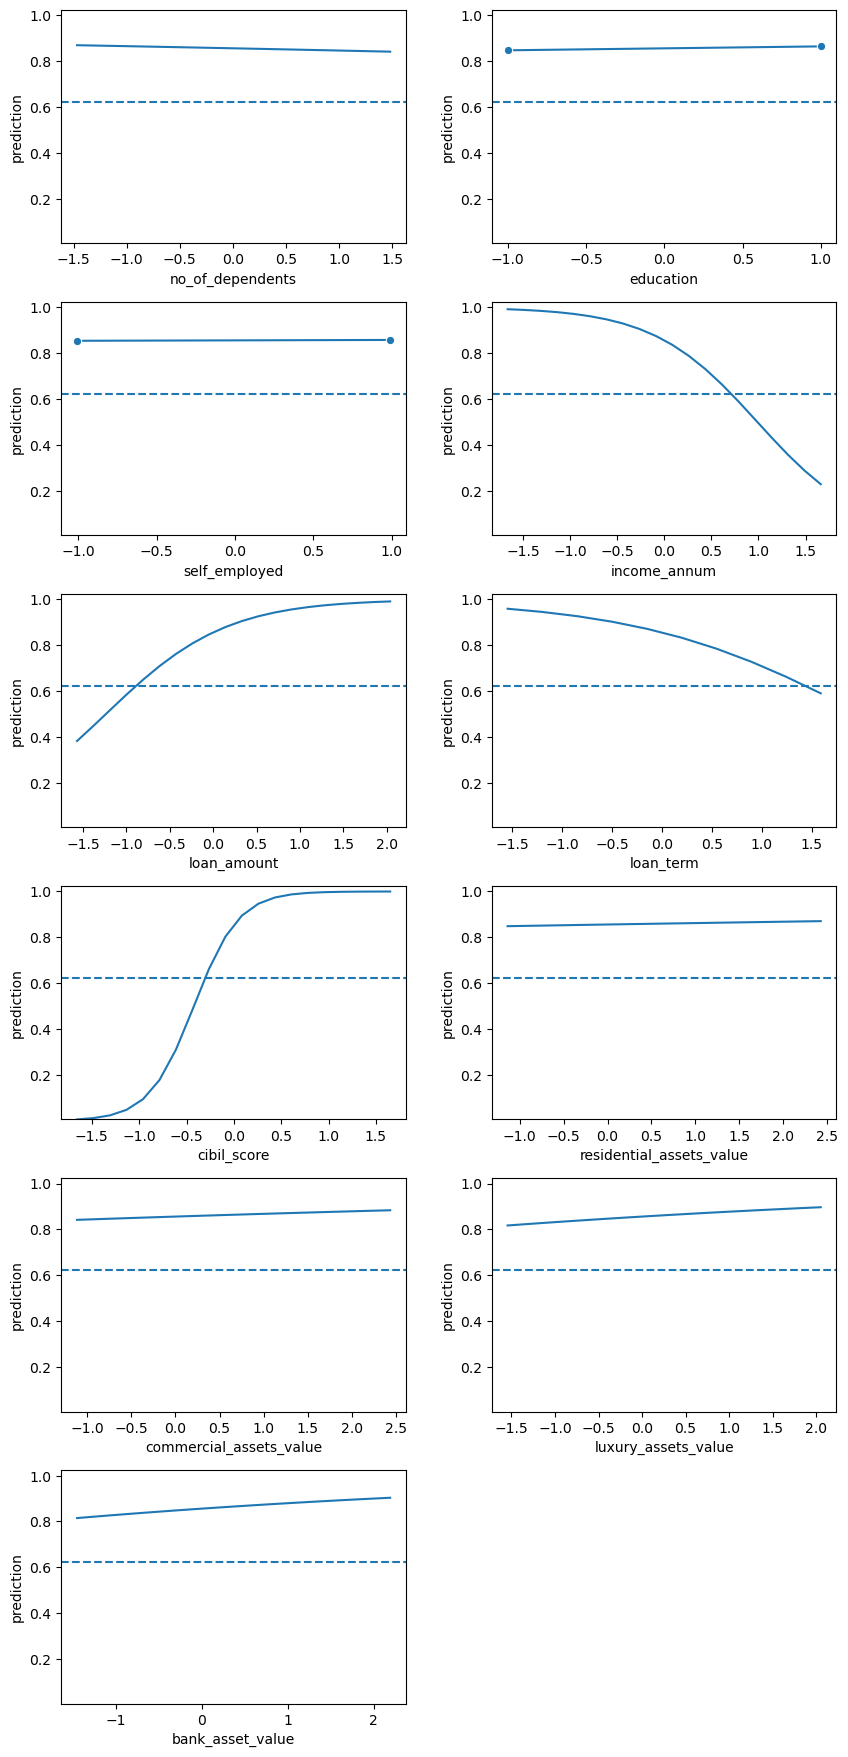

In [37]:
rsm.pred_plot_sm(lr, training_data)

Ok from our prediction plots we can see intuitive relationships between our features and the target. For instance, all of the "assets" variables have a positive relationship with the probability an individual receives a loan. We can also see that the relationship with `loan_status` for some of the features do not seem to be linear. Most obvious is that of `cibil_score` which exhibits something like a cube root relationship. This is a strong indication that a more advanced machine learning model that can pick up on non-linearities should be employed in addition to logistic regression.

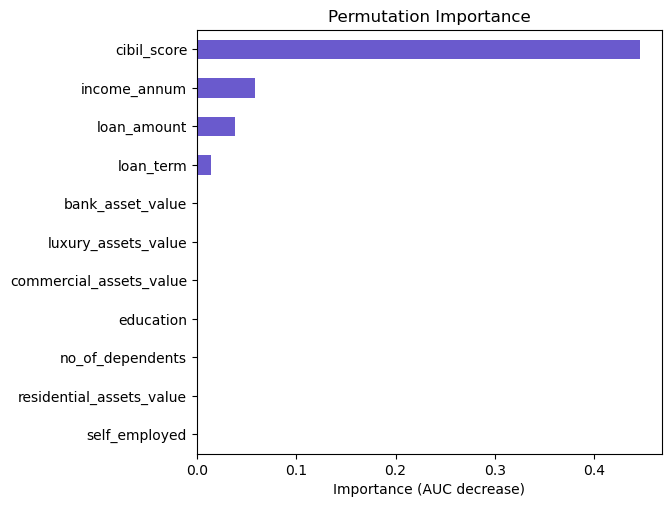

In [38]:
rsm.vimp_plot_sm(lr, training_data)

In the above graph we have the permutation importance of each variable. Permutation importance is used to find the importance of a single feature on the predictive power of a model. We do this by randomly shuffling the values of a feature within the data set to break the relationship between the feature and target, essential turning it into a "noisy" column. We then compute the decrease in AUC between the model with the unaffected and affected feature, which give us a way to measure the importance of a feature (through AUC decrease). For our logisic regression model above, we can see that cibil_score is by far the most important variable in our model which reduces AUC by over 0.4 when randomly shuffled.

In [41]:
training_data["pred_logit"] = lr.predict(training_data)
training_data["pred_logit_bn"] = rsm.ifelse(training_data.pred_logit > 0.5, 1, 0)

In [42]:
accuracy_score(y_train, training_data["pred_logit_bn"])

0.9168374816983894

In [43]:
testing_data["pred_logit"] = lr.predict(testing_data)
testing_data["pred_logit_bn"] = rsm.ifelse(testing_data.pred_logit > 0.5, 1, 0)

In [44]:
accuracy_score(y_test, testing_data["pred_logit_bn"])

0.9121779859484778

In [65]:
# Compute metrics
f1 = f1_score(y_test, testing_data["pred_logit_bn"])
accuracy = accuracy_score(y_test, testing_data["pred_logit_bn"])
auc = roc_auc_score(y_test, testing_data["pred_logit_bn"])

In [72]:
model_metrics = pd.DataFrame({
    'Models': ['Logistic'],
    'F1': [f1],
    'Accuracy': [accuracy],
    'AUC': [auc]
})

In [74]:
model_metrics

,Models,F1,Accuracy,AUC
0,Logistic,0.930362,0.912178,0.902092


From our logistic regression we get a fairly high pseudo r-squared of 0.58, which means that this baseline model does a decent job of explaining the variance within the dataset. In our logisict regression the only features that have statistical significance are annual income, loan term, cibil score, and the amount of the loan. The Cibil Score has an enormous Odds-Ratio of 68, which means that a one unit increase in cibil score multiplies the odds of a person receiving a loan by 68, which is an incredibly large effect. Although not as massive, loan ammount also have a OR above 1, meaning that a single unit increase in this causes the odds of a person receiving a loan by 4 times. Annual income and loan term have ORs below 1, which means that these variables decrease the odds of a loan being accepted as they increaase. As a final step in our evaluation of this model we will check for multicollinearity since we saw some correlation between our variables prior.

In [75]:
rsm.vif(lr)

,variable,vif,Rsq
0,income_annum,17.371,0.942
1,luxury_assets_value,7.263,0.862
2,loan_amount,7.080,0.859
3,bank_asset_value,3.615,0.723
4,commercial_assets_value,1.680,0.405
5,residential_assets_value,1.665,0.399
6,self_employed,1.003,0.003
7,cibil_score,1.002,0.002
8,education,1.002,0.002
9,loan_term,1.002,0.002


As suspected the VIF for income_annum, luxury_assets_value, loan_amount are all well above 5 which suggests the presence of multicollinearity. Instead of simply dropping variables, we will perform PCA (Principal Component Analysis). One reason for doing this is that there are multiple variables that are a potential problem to our analysis, so it's not clear as to what or which combination of variables should be dropped. Since PCA results in a linear combination of the original variables, this will relieve that issue from us. One issue for PCA is interpretability of the principal components, but since our main objective is to achieve the most accurate predictions for loan status, we can disregard this concern.

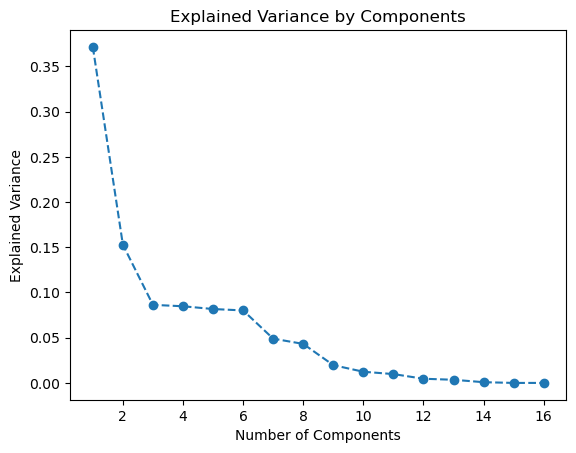

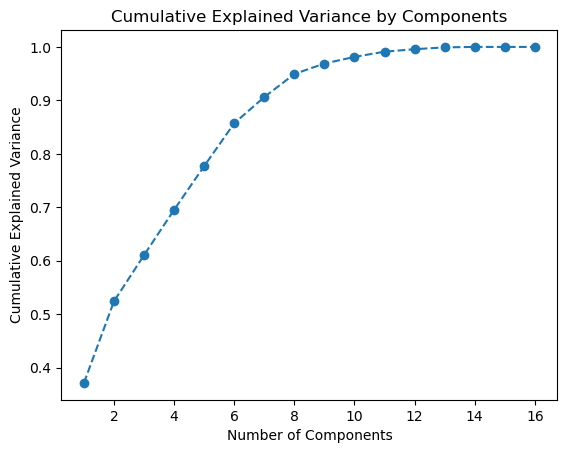

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(training_data)

# Plot the explained variances
explained_variances = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variances)+1), explained_variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

# Cumulative explained variance
cumulative_explained_variances = np.cumsum(explained_variances)
plt.plot(range(1, len(cumulative_explained_variances)+1), cumulative_explained_variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.show()


From the two graphs above, we can see that a good choice for components is 8. In the explained variance plot this is just before our explained variance flattens out, and in the cumulative explained variance plot we see the same pattern at 6 in which our CEV levels off at the max of 1.

In [49]:
pca = PCA(n_components=8)
data2_reduced = pca.fit_transform(training_data)

In [50]:
pc_df = pd.DataFrame(data2_reduced, columns=[f'PC{i}' for i in range(1, 9)])
pc_df['loan_status'] = training_data['loan_status']
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,loan_status
0,-1.068738,-1.272070,0.739097,1.659891,0.255806,0.085338,-0.676074,0.576456,1
1,0.330244,-0.403228,0.297482,-0.447660,0.713591,-1.611681,0.459370,-0.753017,1
2,3.093283,-1.022809,0.448826,-0.855983,0.321292,-1.568327,-0.563221,-1.593886,1
3,0.051956,-1.456736,-1.446939,-0.321309,-0.588977,0.175136,-0.790407,-0.363506,1
4,1.558032,-1.242017,0.729045,1.815800,0.882547,0.079287,0.752014,0.024236,1
...,...,...,...,...,...,...,...,...,...
3410,1.297768,1.698919,-0.024994,0.184227,0.809785,-1.497839,1.278779,-0.955023,0
3411,-3.411029,-0.963950,-1.010548,-0.977975,1.557134,-0.372697,-0.057193,-0.185621,1
3412,0.090318,-0.414907,-0.722966,1.400765,-1.005351,-1.001634,-0.163533,-0.632832,1
3413,-0.778320,1.317640,1.058026,0.890259,-2.207935,0.416350,-0.097501,0.872684,1


In [51]:
formula_str = 'loan_status ~ ' + ' + '.join([f'PC{i}' for i in range(1, 9)])
lr2 = smf.glm(
    formula=formula_str,
    family=Binomial(link=logit()),
    data=pc_df
).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                            GLM   Df Residuals:                     3406
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -549.60
Date:                Tue, 15 Aug 2023   Deviance:                       1099.2
Time:                        15:49:53   Pearson chi2:                 4.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6336
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6407      0.100     16.468      0.000       1.445       1.836
PC1           -0.0746      0.039     -1.936      0.053      -0.150       0.001
PC2           -3.4841      0.124    -28.000      0.000      -3.728      -3.240
PC3           -0.1049      0.079     -1.333      0.183      -0.259       0.049
PC4            0.3627      0.080      4.538      0.000       0.206       0.519
PC5           -0.2468      0.082     -3.010      0.003      -0.408      -0.086
PC6            0.0889      0.082      1.079      0.281      -0.073       0.250
PC7           -0.0182      0.103     -0.177      0.860      -0.220       0.184
PC8            0.0861      0.110      0.779      0.436      -0.130       0.303
==============================================================================
"""

In [52]:
training_data["pred_pca"] = lr.predict(training_data)
training_data["pred_pca_bn"] = rsm.ifelse(training_data.pred_pca > 0.5, 1, 0)
rsm.or_ci(lr2)

,index,OR,OR%,2.5%,97.5%,p.values,
1,PC1,0.928,-7.2%,0.861,1.001,0.053,.
2,PC2,0.031,-96.9%,0.024,0.039,< .001,***
3,PC3,0.900,-10.0%,0.772,1.051,0.183,
4,PC4,1.437,43.7%,1.229,1.681,< .001,***
5,PC5,0.781,-21.9%,0.665,0.918,0.003,**
6,PC6,1.093,9.3%,0.930,1.284,0.281,
7,PC7,0.982,-1.8%,0.802,1.202,0.86,
8,PC8,1.090,9.0%,0.878,1.353,0.436,


In [79]:
testing_data["pred_pca"] = lr.predict(testing_data)
testing_data["pred_pca_bn"] = rsm.ifelse(testing_data.pred_logit > 0.5, 1, 0)
PCA_f1 = f1_score(y_test, testing_data["pred_pca_bn"])
PCA_accuracy = accuracy_score(y_test, testing_data["pred_pca_bn"])
PCA_auc = roc_auc_score(y_test, testing_data["pred_pca_bn"])

In [88]:
model_metrics.loc[1] = ['PCA', PCA_f1, PCA_accuracy, PCA_auc]
model_metrics

,Models,F1,Accuracy,AUC
0,Logistic,0.930362,0.912178,0.902092
1,PCA,0.930362,0.912178,0.902092


In [81]:
rsm.vif(lr2)

,variable,vif,Rsq
0,PC1,1.0,0.0
1,PC2,1.0,0.0
2,PC4,1.0,0.0
3,PC3,1.0,-0.0
4,PC5,1.0,-0.0
5,PC6,1.0,-0.0
6,PC7,1.0,-0.0
7,PC8,1.0,-0.0


After running PCA all of the Odds-Ratios of our components look reasonable and the VIFs are all 1 which is a good sign that our PCA analysis addressed the issues of multicollinearity present in our model before. Lets take a look at the distributions of our predictions to see how they differ when using the raw features vs our principal components.

It seems that although the VIF for our principal components is good, the p-values for each are too high to be significant at any threshold. Thus it is beter to look back to the original regression and try other methods to address the multicollinearity aspect of this problem.

The last logistic regression model we will try is one without income_annum, since it is the problem variable with a VIF well above 10. In doing this there is an innate risk of Omitted Variable Bias, but it is clear that this variable is potentially highly correlated with other variables such as bank_asset_value which could capture the effect of a person's annual income already.

In [82]:
lr3 = smf.glm(
    formula="loan_status ~ no_of_dependents + education + self_employed \
     + loan_amount + loan_term + cibil_score + residential_assets_value + commercial_assets_value \
     + luxury_assets_value + bank_asset_value",
    family=Binomial(link=logit()),
    data=training_data,
).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3415
Model:                            GLM   Df Residuals:                     3404
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -785.19
Date:                Tue, 15 Aug 2023   Deviance:                       1570.4
Time:                        16:07:46   Pearson chi2:                 2.36e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5794
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.7402      0.091     19.218      0.000       1.563       1.918
no_of_dependents            -0.0863      0.065     -1.337      0.181      -0.213       0.040
education                    0.0557      0.065      0.861      0.389      -0.071       0.183
self_employed                0.0219      0.065      0.339      0.735      -0.105       0.148
loan_amount                  0.7513      0.139      5.396      0.000       0.478       1.024
loan_term                   -0.8629      0.071    -12.123      0.000      -1.002      -0.723
cibil_score                  4.1094      0.153     26.845      0.000       3.809       4.409
residential_assets_value    -0.0664      0.082     -0.813      0.416      -0.227       0.094
commercial_assets_value      0.0157      0.080      0.196      0.845      -0.141       0.173
luxury_assets_value         -0.5202      0.136     -3.832      0.000      -0.786      -0.254
bank_asset_value            -0.1112      0.107     -1.035      0.300      -0.322       0.099
============================================================================================
"""

In [84]:
data1["pred_logit_no_income"] = lr3.predict(training_data)
rsm.or_ci(lr3)

,index,OR,OR%,2.5%,97.5%,p.values,
1,no_of_dependents,0.917,-8.3%,0.808,1.041,0.181,
2,education,1.057,5.7%,0.931,1.200,0.389,
3,self_employed,1.022,2.2%,0.901,1.160,0.735,
4,loan_amount,2.120,112.0%,1.614,2.785,< .001,***
5,loan_term,0.422,-57.8%,0.367,0.485,< .001,***
6,cibil_score,60.908,5990.8%,45.121,82.219,< .001,***
7,residential_assets_value,0.936,-6.4%,0.797,1.098,0.416,
8,commercial_assets_value,1.016,1.6%,0.868,1.189,0.845,
9,luxury_assets_value,0.594,-40.6%,0.456,0.776,< .001,***
10,bank_asset_value,0.895,-10.5%,0.725,1.104,0.3,


In [86]:
testing_data["pred_pca"] = lr.predict(testing_data)
testing_data["pred_pca_bn"] = rsm.ifelse(testing_data.pred_logit > 0.5, 1, 0)
no_inc_f1 = f1_score(y_test, testing_data["pred_pca_bn"])
no_inc_accuracy = accuracy_score(y_test, testing_data["pred_pca_bn"])
no_inc_auc = roc_auc_score(y_test, testing_data["pred_pca_bn"])

In [89]:
model_metrics.loc[2] = ['No_Income', no_inc_f1, no_inc_accuracy, no_inc_auc]
model_metrics

,Models,F1,Accuracy,AUC
0,Logistic,0.930362,0.912178,0.902092
1,PCA,0.930362,0.912178,0.902092
2,No_Income,0.930362,0.912178,0.902092


In [90]:
rsm.vif(lr3)

,variable,vif,Rsq
0,loan_amount,4.694,0.787
1,luxury_assets_value,4.514,0.778
2,bank_asset_value,3.056,0.673
3,commercial_assets_value,1.624,0.384
4,residential_assets_value,1.592,0.372
5,self_employed,1.003,0.003
6,cibil_score,1.002,0.002
7,education,1.002,0.002
8,loan_term,1.002,0.002
9,no_of_dependents,1.001,0.001


While our VIFs have all decreased to a reasonable level with the removal of `income_annum`, we have no change in the metrics of our model and very a very small decrease in our R-squared. Interestingly we see that the OR of `luxury_assets_value` increase in effect and became highly statisitcally significant. This is a strong indication that the effect of `income_annum` is being absorbed by this variable, and to avoid potential OVB we will opt to include `income_annum` in our analysis here on out.

## Validating Our Threshold

Without having been given a cutoff, for the purposes of our analysis we will have to come up with our own cutoff to test the accuracy of our models. Although a simple cutoff of 0.5 is common practice there is no analytical background supporting this, so we will try to choose something supported by more rational. Although determining a cutoff based on business reliant aspects would be preferential, we do not have enough industry knowledge nor context for the business to make such a decision appropriately. For our analysis we will determine our cutoff trying to minimize the number of False-Positive occurrences. In our case False-Positives correspond to instances when a loan is issued to an individual who should not have received one. We will test the default threshold of 0.5 by looking at the ROC and Precision-Recall curves.

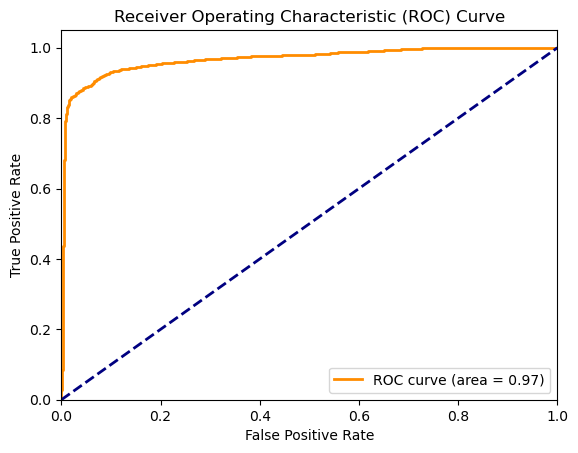

In [99]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


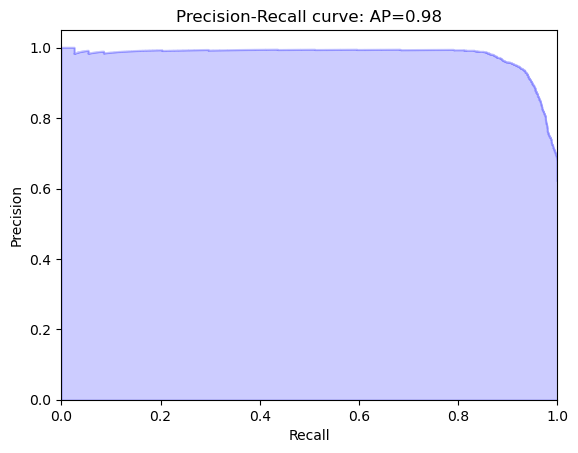

In [100]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_train, training_data.pred_logit)
average_precision = average_precision_score(y_train, training_data.pred_logit)

# Plot
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

It seems from both the ROC and Precision-Recall curves that our threshold of 0.5 is more than sufficient, when looking at the training set we have an area of 0.97 and AP of 0.98 which point to the fact that these models do a very good job in predicting the target.

## NN

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


In [58]:
rvar = "loan_status"
evar = [
    "no_of_dependents", "education", "self_employed", "loan_amount",
    "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]

idvar = "loan_id"

In [59]:
X = data1[evar]
y = data1[rvar]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [61]:
# Create train DataFrame with 'training' column set to 1
df_train = x_train.copy()
df_train['loan_status'] = y_train
df_train['training'] = 1

# Create test DataFrame with 'training' column set to 0
df_test = x_test.copy()
df_test['loan_status'] = y_test
df_test['training'] = 0

# Combine train and test DataFrames
full_df = pd.concat([df_train, df_test], axis=0).sort_index()
full_df

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,training
0,2,1,0,29900000,12,778,2400000,17600000,22700000,8000000,1,1
1,0,0,1,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,1,0,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,1,0,30700000,8,467,18200000,3300000,23300000,7900000,0,1
4,5,0,1,24200000,20,382,12400000,8200000,29400000,5000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,0,0,1,11300000,20,559,4200000,2900000,11000000,1900000,1,0
4266,2,0,0,23900000,18,457,1200000,12400000,18100000,7300000,0,1
4267,1,0,0,12800000,8,780,8200000,700000,14100000,5800000,1,1


In [62]:
data_std = rsm.scale_df(full_df, train=full_df.training == 1)
data_std

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,training
0,-0.144252,1,0,0.829568,0.098168,0.516395,-0.390225,1.446233,0.415865,0.466209,1,1
1,-0.733862,0,1,-0.161980,-0.250864,-0.527449,-0.366856,-0.316792,-0.348737,-0.260222,0,1
2,0.150554,1,0,0.818364,0.796232,-0.270102,-0.024104,-0.053483,0.998943,1.208096,0,0
3,0.150554,1,0,0.874384,-0.250864,-0.382872,0.840565,-0.190862,0.448869,0.450753,0,1
4,0.740164,0,1,0.510256,0.796232,-0.628653,0.388756,0.370101,0.784414,0.002530,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,0.740164,1,1,-0.716574,0.098168,-0.816602,-0.359066,-0.511412,-0.651277,-0.646621,0,1
4265,-0.733862,0,1,-0.212397,0.796232,-0.116851,-0.250008,-0.236655,-0.227721,-0.476605,1,0
4266,-0.144252,0,0,0.493450,0.621716,-0.411788,-0.483703,0.850926,0.162831,0.358017,0,1
4267,-0.439057,0,0,-0.128368,-0.250864,0.522178,0.061584,-0.488515,-0.057198,0.126178,1,1


In [63]:
X = data_std[evar].copy()
y = data_std.loan_status
X

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.144252,1,0,0.829568,0.098168,0.516395,-0.390225,1.446233,0.415865,0.466209
1,-0.733862,0,1,-0.161980,-0.250864,-0.527449,-0.366856,-0.316792,-0.348737,-0.260222
2,0.150554,1,0,0.818364,0.796232,-0.270102,-0.024104,-0.053483,0.998943,1.208096
3,0.150554,1,0,0.874384,-0.250864,-0.382872,0.840565,-0.190862,0.448869,0.450753
4,0.740164,0,1,0.510256,0.796232,-0.628653,0.388756,0.370101,0.784414,0.002530
...,...,...,...,...,...,...,...,...,...,...
4264,0.740164,1,1,-0.716574,0.098168,-0.816602,-0.359066,-0.511412,-0.651277,-0.646621
4265,-0.733862,0,1,-0.212397,0.796232,-0.116851,-0.250008,-0.236655,-0.227721,-0.476605
4266,-0.144252,0,0,0.493450,0.621716,-0.411788,-0.483703,0.850926,0.162831,0.358017
4267,-0.439057,0,0,-0.128368,-0.250864,0.522178,0.061584,-0.488515,-0.057198,0.126178


In [64]:
param_grid = {
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'hidden_layer_sizes': [(1,), (1,1), (1,5), (5,)],
}

scoring = {"AUC": "roc_auc"}

clf = MLPClassifier(random_state=1234, max_iter=10000)

grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=5, refit="AUC", verbose=1, n_jobs=-1)

grid_search.fit(X[data_std.training == 1], y[data_std.training == 1])

# Print the best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n", grid_search.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (5,), 'solver': 'lbfgs'}
Best cross-validation score: 1.00
Best estimator:
 MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(5,),
              max_iter=10000, random_state=1234, solver='lbfgs')


In [65]:
from sklearn.metrics import f1_score

# Using the best model from grid search
best_model = grid_search.best_estimator_

X_test = X[data_std.training == 0]
y_test = y[data_std.training == 0]

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute and print the F1 score
f1_test = f1_score(y_test, y_pred)

print("F1 score on the test set: {:.2f}".format(f1_test))


F1 score on the test set: 0.98


In [66]:
nn_f1 = f1_score(y_test, best_model.predict(X_test))
nn_accuracy = accuracy_score(y_test, best_model.predict(X_test))
nn_auc = roc_auc_score(y_test, best_model.predict(X_test))

In [67]:
nn_auc

0.965816002285541

In [68]:
model_metrics.loc[3] = ['NN', nn_f1, nn_accuracy, nn_auc]
model_metrics

,Models,F1,Accuracy,AUC
0,Logistic,0.930362,0.912178,0.902092
1,PCA,0.930362,0.912178,0.902092
2,No_Income,0.930362,0.912178,0.902092
3,NN,0.975655,0.969555,0.965816


In [69]:
data_std['nn_pred'] = best_model.predict(X)

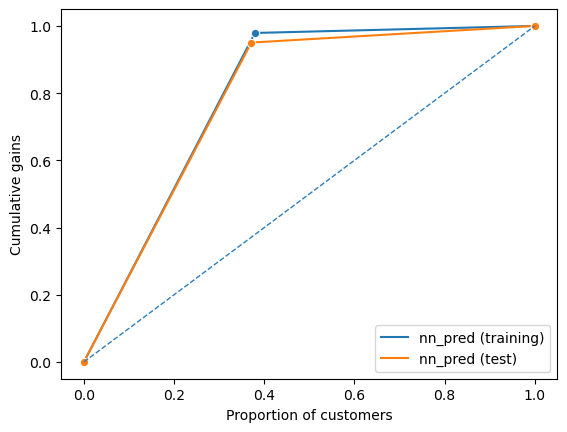

In [70]:
dct = {
    "training": data_std[data_std.training == 1],
    "test": data_std[data_std.training == 0],
}
fig = rsm.gains_plot(dct, "loan_status", 0, "nn_pred")

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
X = full_df[evar].copy()
y = full_df.loan_status
X

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,2300000,12,317,2800000,500000,3300000,800000
4265,0,0,1,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,0,0,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,0,0,12800000,8,780,8200000,700000,14100000,5800000


In [73]:
clf = RandomForestClassifier()

param_grid = {
    "n_estimators": list(range(100, 400, 50)),
    "max_features": list(range(1, 5, 1)),
}

scoring = {"AUC": "roc_auc"}

In [74]:
clf_cv = GridSearchCV(
    clf, param_grid, scoring=scoring, cv=5, n_jobs=4, refit="AUC", verbose=5
).fit(X[full_df.training == 1], y[full_df.training == 1])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [75]:
clf_cv.best_params_

{'max_features': 4, 'n_estimators': 100}

In [76]:
clf_cv.best_score_

0.9971363429092568

In [79]:
rf_f1 = f1_score(y_test, clf_cv.predict(X[full_df.training == 0]))
rf_accuracy = accuracy_score(y_test, clf_cv.predict(X[full_df.training == 0]))
rf_auc = roc_auc_score(y_test, clf_cv.predict(X[full_df.training == 0]))

In [80]:
model_metrics.loc[4] = ['RF', rf_f1, rf_accuracy, rf_auc]
model_metrics

,Models,F1,Accuracy,AUC
0,Logistic,0.930362,0.912178,0.902092
1,PCA,0.930362,0.912178,0.902092
2,No_Income,0.930362,0.912178,0.902092
3,NN,0.975655,0.969555,0.965816
4,RF,0.983114,0.978923,0.976381


In [88]:
full_df['rf_pred'] = clf_cv.predict(X)

In [89]:
full_df

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,training,rf_pred
0,2,1,0,29900000,12,778,2400000,17600000,22700000,8000000,1,1,1
1,0,0,1,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,1,0,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,1,0,30700000,8,467,18200000,3300000,23300000,7900000,0,1,0
4,5,0,1,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,2300000,12,317,2800000,500000,3300000,800000,0,1,0
4265,0,0,1,11300000,20,559,4200000,2900000,11000000,1900000,1,0,1
4266,2,0,0,23900000,18,457,1200000,12400000,18100000,7300000,0,1,0
4267,1,0,0,12800000,8,780,8200000,700000,14100000,5800000,1,1,1


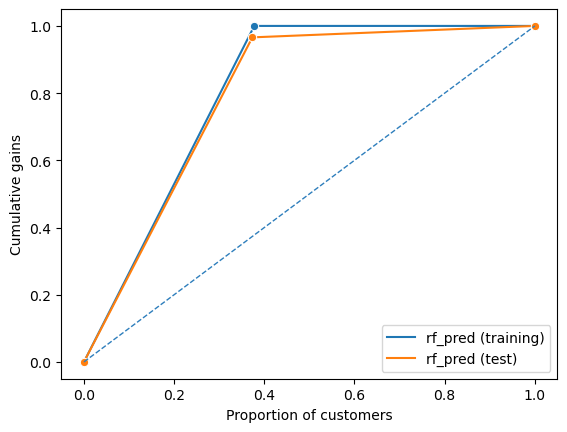

In [91]:
dct = {
    "training": full_df[full_df.training == 1],
    "test": full_df[full_df.training == 0],
}
fig = rsm.gains_plot(dct, "loan_status", 0, "rf_pred")

In [92]:
model_metrics

,Models,F1,Accuracy,AUC
0,Logistic,0.930362,0.912178,0.902092
1,PCA,0.930362,0.912178,0.902092
2,No_Income,0.930362,0.912178,0.902092
3,NN,0.975655,0.969555,0.965816
4,RF,0.983114,0.978923,0.976381


## Conclusion

It looks like our Random Forest Model s the best metrics across the board. It's useful to think about why our Random Forest performs best and why we would recommend to use this model moving forward. One key reason is obviously because it does the best job at minimizing false positives (i.e. people who got a loan who shouldn't have). In our case false positives represent the most costly scenario. These are people who were predicted suitable for a loan but were truly not. In a real life scenario we would suffer the most losses from this group, because they would be receiving loans and have the highest risk of not paying them off. False positives can be measured through precision which is the ratio of true positives to the sum of true and false positives. However we do not want to measure our performance in this regard only with precision, and have to take into account recall (ratio of true positives to true positives and false negatives). This is best captured through the F1 score, which is the harmonic mean between precision and recall. Since our random forest maximizes this relative to our other models, as well as maintaining a high measure of AUC and accuracy, by this metric this would be the model we would recommend the business to use to predict which customers should be offered a loan. Another reason why we should utilize the Random Forest is because it inherently is not sensitive to multicollinearity. As we noticed previously during logistic regression, `income_annum` had an extremely high VIF, indictating the presence of multicollinearity within the predictive features. As a tree based model, the random forest does not take into account the correlation of two variables when deciding how to split, thus it is not heavily affected by multicollinearity. With these reason in mind, the random forest seems to be the best model available for this dataset. Further analysis could be done using another tree based model, such as an XG Booseted tree, to see if even better prediction could be attained.